# Task 1

A template code for calculating FCFs for $H_2$ - $H_2^+$ using the harmonic oscillator approximation. 

Imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from FCF_helper import FCFSpec

Initialize the `FCFSpec` object. Modify `n_0_max` and `n_p_max` (the maximum vibrational states of $H_2$ and $H_2^+$ that we'll look at calculating FCFs for) in order to get 10 transitions starting from n_0=0.

In [2]:
n_0_max = 0
n_p_max = 10

fcfspec = FCFSpec(n_0_max, n_p_max)

Calculate all the FCFs and print the results.

In [3]:
spectrum = fcfspec.spectrum_analysis()
print("n_0\t\t n_p\t\t FCF\t\t Ep-E0")
print(spectrum)

n_0		 n_p		 FCF		 Ep-E0
[[0.00000000e+00 0.00000000e+00 1.00000000e+00 1.23378957e+05]
 [0.00000000e+00 1.00000000e+00 2.95139079e+00 1.25700957e+05]
 [0.00000000e+00 2.00000000e+00 3.49048846e+00 1.28022957e+05]
 [0.00000000e+00 3.00000000e+00 2.01446220e+00 1.30344957e+05]
 [0.00000000e+00 4.00000000e+00 5.16711333e-01 1.32666957e+05]
 [0.00000000e+00 5.00000000e+00 2.55047939e-02 1.34988957e+05]
 [0.00000000e+00 6.00000000e+00 8.26500159e-03 1.37310957e+05]
 [0.00000000e+00 7.00000000e+00 1.09734335e-02 1.39632957e+05]
 [0.00000000e+00 8.00000000e+00 1.39346082e-03 1.41954957e+05]
 [0.00000000e+00 9.00000000e+00 8.39894919e-05 1.44276957e+05]
 [0.00000000e+00 1.00000000e+01 2.53763959e-04 1.46598957e+05]]


Now, let us plot Franck-Condon factors against the transition energy.

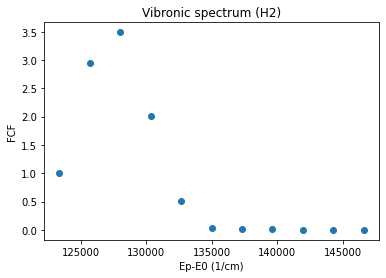

In [13]:
x = spectrum[:, 3]
y = spectrum[:, 2]
plt.scatter(x, y)
plt.title('Vibronic spectrum (H2)')
plt.xlabel('Ep-E0 (1/cm)')
plt.ylabel('FCF')
plt.show()

To compare the results of our calculation with the experimental results from /citation-here/ it is visually more appealing to convert the energies in our plot to electron volts (since the plot in the cited article is in electron volts) and also, instead of scatter plot it is better to have vertical bars showing the amplitude at each peak. 

Note, that to make the plot similar to the plot of the experimental data in the specification of the task we plot the energy axis is reverse (decreasing) order.

TODO: in addition to vertical bars, it will be nice to have Loretzian smoothing as well.

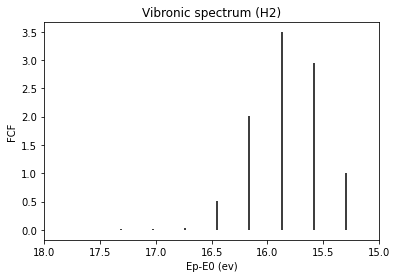

In [14]:
invcm_to_ev = 0.000123984
x_ev = invcm_to_ev * x
plt.vlines(x_ev, 0, y)
plt.xlim(18, 15)
plt.title('Vibronic spectrum (H2)')
plt.xlabel('Ep-E0 (ev)')
plt.ylabel('FCF')
plt.show()

And here is the plot from the experimental data

<img src="Berkowitz.png" align="left" style="width: 400px;"/>

As we can see we have correctly predicted the positions of peaks, and the relative intensities of the predicted peaks is in line with the experimental data. E.g. the strongest peak is the third one counting from right (with energy a bit less than $16 ev$), in both the experimental data and the theoretically calculated one